### Transient Diffusion (Boundary Value Problem - BVP)

$\frac{∂C}{∂t}=D \nabla^2C$

$\frac{∂}{∂t}C(z,t)=D\frac{∂^2}{∂z^2}C(z,t)$ (1D)


We approximate the temporal (index j) and spatial derivative (index j) as:

$\frac{∂C}{∂t}|_{i,j} \approx \frac{C_{i,j+1}-C_{i,j}}{\Delta t}$

$\frac{∂^2C}{∂z^2}|_{i,j} \approx \frac{C_{i+1,j}-2C_{i,j}+C_{i-1,j}}{\Delta z^2}$

Here, we discretize this equation in both time and space to arrive to the solution. Note that we cannot use the method of lines here because we have the derivative-based boundary condtion.

We solve for the unknown solution at a later time step as:

\\(  C_{{i},{j+1}} = aC_{{i+1},{j}} + \left( 1-2a \right)C_{{i},{j}} + aC_{{i-1},{j}} \\)

where \\(  a = D\frac{\Delta t}{\Delta z^2} \\)

**Data**

- Length of wall: L = 1 m

- Initial condition: \\(  C_0(z) =0 \\)

- Boundary condition 1: \\(  C(0, t) = 0.1 \\)

- Boundary condition 2:  \\(  \frac{\partial C}{\partial z} \left( L,t \right) = 0\\)

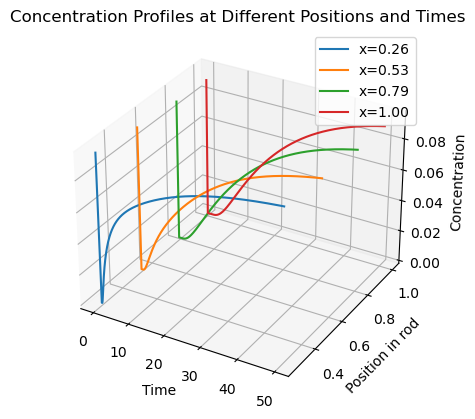

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

zpoints = 20                         # spatial grid size, index i
zEnd = 1.0                           # length of rod
z = np.linspace(0, zEnd, zpoints)    # position along the rod
dz = zEnd /(zpoints-1)               # discretization for spatial direction

C0t = 0.1                            # concentration at z = 0
D = 0.02

tpoints = 1000                       # time grid size, index j
tEnd = 50.0                          # time to stop calculations
t = np.linspace(0, tEnd, tpoints)    
dt = tEnd/(tpoints-1)                # discretization for temporal direction

alpha = D*dt/dz**2                   # calculate the value of alpha

C_xt = []                            # container for all the time steps
C = np.zeros(z.shape)                # create the array for the concentration profile based on the positions along the rod
C[0] = C0t                           # initial condition at z = 0                      
C_xt += [C]                          # add concentration profile for the 1st time step

for j in np.arange(1, tpoints):      # you are going to iterate in time 
    u = C.copy()                     # you create another dummy array to make the calculations
    u[0] = C0t                       # initial condtion at z = 0
    u[-1] = u[-2]                    # derivative boundary condtion at flux = 0
    u[1:-1] = alpha*C[2:] + (1 - 2 * alpha) * C[1:-1] + alpha * C[:-2]
    C[:] = u                         # update the initially created C using the dummy u array with the calculations
    C_xt.append(u)                   # put it in time-step container


C_xt = np.array(C_xt)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in [5, 10, 15, 19]:
    ax.plot(t, z[i]*np.ones(tpoints), C_xt[:, i], label='x={0:1.2f}'.format(z[i]))

ax.set_xlabel('Time')
ax.set_ylabel('Position in rod')
ax.set_zlabel('Concentration')
ax.set_title('Concentration Profiles at Different Positions and Times')
ax.legend(loc='best')

plt.show()

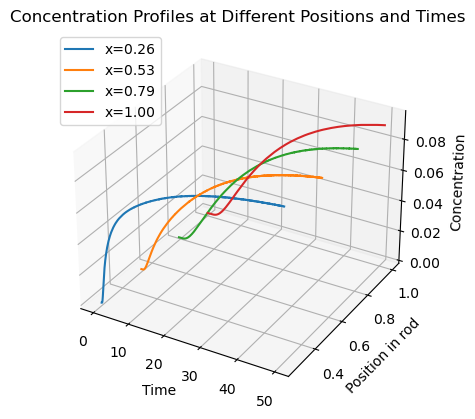

In [14]:
from scipy.integrate import solve_ivp

zpoints = 20                         # spatial grid size, index i
zEnd = 1.0                           # length of rod
z = np.linspace(0, zEnd, zpoints)    # position along the rod
dz = zEnd /(zpoints-1)               # discretization for spatial direction

C0t = 0.1                            # concentration at z = 0
D = 0.02

tpoints = 1000                       # time grid size, index j
tEnd = 50.0                          # time to stop calculations
t = np.linspace(0, tEnd, tpoints)    


alpha = D*dt/dz**2                   # calculate the value of alpha

def f_ODE(t, u):
    """
    - This function calculates the time derivatives of the concentration at each spatial grid point u. It represents 
      the system of differential equations governing the diffusion process along the rod.
    - u is the array containing the concentrations at each spatial grid point.
    - dudt is an array of zeros with the same size as u, representing the time derivatives of the concentrations.
    """
    dudt = np.zeros(u.shape)
    dudt[1:-1] = D/dz**2*(u[2:] - 2*u[1:-1] + u[:-2])
    dudt[-1] = dudt[-2]
    return dudt

# y0 is the initial concentration profile along the rod. 20 differential equations are going to be solved
y0 = np.zeros(zpoints)
y0[0] = C0t


"""
sol.y is a 2D array containing the concentrations at each spatial grid point (zpoints) over time (tpoints). 
Each row of sol.y corresponds to the concentration profile at a specific spatial grid point (position z[i], 
where i is the row index) along the rod.
Each column of sol.y represents the concentration profile at a specific time point (time t[j], where j is the column index) 
for all spatial grid points.
"""
sol = solve_ivp(f_ODE, (0, tEnd), y0, method = 'RK45', t_eval = t)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in [5, 10, 15, 19]:
    ax.plot(t, z[i]*np.ones(tpoints), sol.y[i], label='x={0:1.2f}'.format(z[i]))

ax.set_xlabel('Time')
ax.set_ylabel('Position in rod')
ax.set_zlabel('Concentration')
ax.set_title('Concentration Profiles at Different Positions and Times')
ax.legend(loc='best')

plt.show()

In [13]:
"""
So sol.y[19] corresponds to the 20th row of sol.y
which represents the concentration profile at the 20th spatial grid point along the rod (position z[19]) over time.
"""
sol.y[19] 

array([0.00000000e+00, 2.19795244e-24, 7.22824641e-20, 3.29191740e-17,
       5.83706455e-16, 2.10233106e-14, 3.48264294e-13, 3.35205008e-12,
       1.98860127e-11, 1.06047837e-10, 4.08409952e-10, 1.36385912e-09,
       3.87380116e-09, 9.82784028e-09, 2.26558489e-08, 4.74440295e-08,
       9.50357606e-08, 1.72827393e-07, 3.11140729e-07, 5.14536137e-07,
       8.36970574e-07, 1.31942456e-06, 1.95144833e-06, 2.92747186e-06,
       4.10875602e-06, 5.79603736e-06, 7.86720591e-06, 1.05668728e-05,
       1.39019183e-05, 1.79819744e-05, 2.30486515e-05, 2.88600482e-05,
       3.61387367e-05, 4.42184771e-05, 5.39264872e-05, 6.51311217e-05,
       7.75075228e-05, 9.21958605e-05, 1.07945820e-04, 1.26229467e-04,
       1.45949585e-04, 1.68233118e-04, 1.92334723e-04, 2.18907846e-04,
       2.48043151e-04, 2.78867358e-04, 3.13449075e-04, 3.49239674e-04,
       3.88549430e-04, 4.30485431e-04, 4.74503151e-04, 5.22221592e-04,
       5.71687934e-04, 6.25003755e-04, 6.80108314e-04, 7.39152440e-04,
      